# Języki skryptowe - Python
## Wykład 11

---

* programowania obiektowego ciąg dalszy

## Na ostatnim wykładzie

---

* klasy pozwalają na definiowanie własnych typów
* funkcje specjalne - definiowanie działania operatorów lub wywołań funkcji wbudowanych (*print*, *len*...)
* nie ma "pełnej prywatności"
* atrybuty klasowe

## Konwencja *self*

---

* pierwszym argumentem każdej metody jest wskaźnik na obiekt
* przyjęto nazywać ten argument *self* (choć nic nie stoi na przeszkodzie, żeby używać innej nazwy)

## *self* test

---

In [1]:
class Foo:
    
    def moja_metoda(): # błąd
        pass

In [2]:
x = Foo()
x.moja_metoda()
# bo x jest pierwszym argumentem pozycyjnym!

TypeError: moja_metoda() takes 0 positional arguments but 1 was given

## Funkcja globalna

---

In [3]:
class Foo:
    
    def __init__(self): # "konstruktor"
        self.bar = False
        
    def __str__(self): # print
        return "Foobar = {}".format(self.bar)
    
def funkcja(obiekt):  # funkcja globalna
    obiekt.bar = True # ustaw flagę bar

In [4]:
x = Foo() # stwórz obiekt typu Foo

print(x)

funkcja(x) # globalna na x

print(x)

Foobar = False
Foobar = True


## Metoda z funkcji globalnej

---

In [5]:
class Foo:
    
    def __init__(self): # "konstruktor"
        self.bar = False
        
    def __str__(self): # print
        return "Foobar = {}".format(self.bar)
    
    def funkcja(obiekt):  # metoda
        obiekt.bar = True # ustaw flagę bar

In [6]:
x = Foo() # stwórz obiekt typu Foo

print(x)

x.funkcja() # metoda (x jest arg pozycyjnym)

print(x)

Foobar = False
Foobar = True


## Punkt

---

In [7]:
class Punkt:
    
    def __init__(self, x=0.0, y=0.0):
        self.x = x # odcięta 
        self.y = y # rzędna
        
    def __str__(self): # (x, y)
        return "({}, {})".format(self.x, self.y)

In [8]:
x = Punkt(1.0, 2.0) 

print(x)

(1.0, 2.0)


## Odcinek

---

In [9]:
from math import sqrt

class Odcinek:
    
    def __init__(self, start, end):
        self.poczatek = start # Punkt
        self.koniec = end     # Punkt
        
    def dlugosc(self):
        # Odcinek.Punkt.Wspolrzedna
        x = self.koniec.x - self.poczatek.x
        y = self.koniec.y - self.poczatek.y
        return sqrt(x**2 + y**2)

In [10]:
a = Punkt()  # (0, 0)
b = Punkt(2) # (2, 0)
o = Odcinek(a, b)

o.dlugosc()

2.0

## Enkapsulacja

---

* enkapsulacja - ukrywanie implementacji
* brak bezpośredniego dostępu do danych
* tylko własne metody moga zmienić stan
* w Pythonie jest to umowne, bo nie ma zmiennych prywatnych

## Przykład - cząstka

---

In [11]:
class Particle:
    
    def __init__(self, mass, velocity=0.0):
        self.m = mass     # masa
        self.v = velocity # prędkość
        self.ped()        # ustala pęd

    def __str__(self):
        return "m = {m}, v = {v}, p = {p}"\
                .format(m=self.m, v=self.v, p=self.p)
        
    def ped(self): # liczy pęd cząstki
        self.p = self.m*self.v

## Cząstka - test

---

In [12]:
x = Particle(10, 10) # masa = 10, prędkość = 10

print(x) # pęd = masa * prędkość

m = 10, v = 10, p = 100


In [13]:
x.v = 0  # zmień prędkość

print(x) # pęd nie został uaktulaniony

m = 10, v = 0, p = 100


## *Gettery* i *settery*

---

In [14]:
class Particle:
    
    def __init__(self, mass, velocity=0.0):
        self.__m = mass     # masa
        self.__v = velocity # prędkość
        self.ped()          # ustala pęd
        
    def __str__(self):
        return "m = {m}, v = {v}, p = {p}"\
                .format(m=self.__m, v=self.__v, p=self.__p)
        
    def ped(self): # liczy pęd cząstki
        self.__p = self.__m*self.__v
        
    def get_v(self): # pobierz prędkośc
        return self.__v
    
    def set_v(self, v): # ustaw prędkość
        self.__v = v
        self.ped() # aktualizuj pęd

## *get*, *set* - test

---

In [15]:
x = Particle(10, 10) # masa = 10, prędkość = 10

print(x)

m = 10, v = 10, p = 100


In [16]:
x.set_v(0) # zmień prędkość

print(x) # pęd został uaktulaniony

m = 10, v = 0, p = 0


In [17]:
x.get_v() # pobierz prędkość

0

## Dziedziczenie

---

* umożliwia ponowne wykorzystanie funkcjonalności *klas bazowych* w *klasach pochodnych*
* przykład:
    * klasa pojazd: jedz, hamuj...
    * klasa samochód: to co pojazd + otwórz bagażnik...
    * klasa motor: to co pojazd + jedz na jednym kole...

## Przykład

---

In [18]:
class Baza:
    
    def whoami(self):
        print("Jestem obiektem klasy Baza.")
        
class Pochodna(Baza): # dziedziczy z Baza
    
    def sayhi(self):
        print("Hello!")

In [19]:
x = Pochodna()

x.sayhi() # zdefiniowane w Pochodna

Hello!


In [20]:
x.whoami() # zdefiinowane w Baza

Jestem obiektem klasy Baza.


## Konstruktor klasy bazowej

---

In [21]:
class Foo:
    
    def __init__(self):
        print("Tworzę Foo")
        
class Bar(Foo):
    
    def __init__(self):
        print("Tworzę Bar")

In [22]:
x = Bar() # __init__ z Foo nie jest wywołany

Tworzę Bar


## Wywołanie konstruktora bazy

---

In [23]:
class Foo:
    
    def __init__(self):
        print("Tworzę Foo")
        
class Bar(Foo):
    
    def __init__(self):
        super().__init__() # wywołaj konstruktor klasy nadrzędnej
        print("Tworzę Bar")

In [24]:
x = Bar()

Tworzę Foo
Tworzę Bar


## Przykład - Student

---

In [25]:
class Student:
    
    last_index = 1234 # atrybut klasy
    
    def __init__(self, name):
        # aktualizuj numer indeksu
        self.__class__.last_index += 1
        # przypisz studentowi imię i numer indeksu
        self.name = name
        self.index = self.__class__.last_index
        
    def __str__(self): # Student [imię] (nr indeksu)
        return "Student {} (nr {})".format(self.name, self.index)

In [26]:
student = Student("Anna")

print(student)

Student Anna (nr 1235)


## Przykład - StudentISSP

---

In [27]:
class StudentISSP(Student): # też Student
    
    def __init__(self, name, przedmioty):
        
        super().__init__(name) # wywołaj Student.__init__
        
        self.przedmioty = przedmioty
        
    def __str__(self):
        return super().__str__() + \
                ": " + ", ".join(self.przedmioty)

In [28]:
studentISSP = StudentISSP("Jan", ["programowanie", "fizyka"])

print(studentISSP)

Student Jan (nr 1236): programowanie, fizyka


## Polimorfizm

---

* współdzielenie *interfejsu* przez różne typy

In [29]:
class Kot:
    def glos(self):
        print("Miau")

class Pies:
    def glos(self):
        print("Hau")

class Krowa:
    def glos(self):
        print("Muu") 

In [30]:
for zwierze in [Kot(), Pies(), Krowa()]:
    zwierze.glos() # za każdym razem inny typ

Miau
Hau
Muu


## Ryby głosu nie mają

---

In [31]:
class Ryba:
    pass # brak definicji glos

In [32]:
for zwierze in [Kot(), Pies(), Krowa(), Ryba()]:
    zwierze.glos() # Ryba nie ma zdefiniowanej metody glos

Miau
Hau
Muu


AttributeError: 'Ryba' object has no attribute 'glos'

## Wymuszanie interfejsu

---

In [33]:
class Zwierze:
    def glos(self):
        pass
    
class Kot(Zwierze):
    def glos(self): # nadpisuje Zwierze.glos
        print("Miau")
        
class Ryba(Zwierze):
    pass

In [34]:
for zwierze in [Kot(), Ryba()]:
    zwierze.glos() # Ryba siedzi cicho

Miau


## Większe wymuszanie interfejsu

---

In [35]:
class Zwierze:
    def glos(self):
        raise NotImplementedError("Każde zwiesze musi mieć głos.")
    
class Kot(Zwierze):
    def glos(self): # nadpisuje Zwierze.glos
        print("Miau")
        
class Ryba(Zwierze):
    pass

In [36]:
for zwierze in [Kot(), Ryba()]:
    zwierze.glos() # Ryba zwróci błąd

Miau


NotImplementedError: Każde zwiesze musi mieć głos.

## Przykład - Wielokąt

---

In [37]:
class Wielokat:
    
    def __init__(self, *boki):
        self.boki = boki # krotka
        
    def obwod(self):          # suma długości
        return sum(self.boki) # boków
        
    def pole(self): raise NotImplementedError

In [38]:
w = Wielokat(1, 2, 3, 4, 5) # pięciokąt

w.obwod()

15

## Przykład - Trójkąt

---

In [39]:
class Trojkat(Wielokat):
    
    def __init__(self, *boki):
        super().__init__(*boki) # utwórz wielokąt
        
    def pole(self):
        pole = p = self.obwod()/2 # obwod zdefiniowane w Wielokat
        
        for bok in self.boki: # wzór Herona
            pole *= (p - bok) # p(p - a)(p - b)(p - c)
            
        return pole**0.5 # pierwiastek

In [40]:
t = Trojkat(3, 4, 5)

t.obwod() # z Wielokat

12

In [41]:
t.pole() # z Pole

6.0

## Przykład - Trójkąt Równoboczny

---

In [42]:
class TrojkatR(Trojkat):
    
    def __init__(self, bok):
        super().__init__(bok, bok, bok) # Trójkąt -> Wielokąt
        
    def pole(self):
        return (self.boki[0]**2)*(3**0.5)/4

In [43]:
t = TrojkatR(3) # (3, 3, 3)

t.pole() # TrojkatR.pole()

3.8971143170299736

In [44]:
t = Trojkat(3, 3, 3)

t.pole() # Trojkat.pole() 

3.897114317029974

## Wielokrotne dziedziczenie

---

* klasa może posiadać kilka klas bazowych
* posiada wtedy wszystkie dane i metody
* a co jeśli się powtarzają?

## Przykład - amifibia

---

In [45]:
class Samochod:
    
    def jedz(self):
        print("Jadę...")
        
class Lodz:
    
    def plyn(self):
        print("Płynę...")
        
class Amfibia(Samochod, Lodz): pass

In [46]:
amfibia = Amfibia()

amfibia.jedz() # Samochod
amfibia.plyn() # Lodz

Jadę...
Płynę...


## Przykład - amifibia v2

---

In [47]:
class Samochod:
    def run(self):
        print("Jadę...")
        
class Lodz:
    def run(self):
        print("Płynę...")
        
class Amfibia1(Samochod, Lodz): pass
class Amfibia2(Lodz, Samochod): pass

In [48]:
amifibia1 = Amfibia1()
amifibia1.run()

Jadę...


In [49]:
amifibia2 = Amfibia2()
amifibia2.run()

Płynę...


## Klasa Screen

---

* napiszemy klasę, która będzie naszym wirtualnym ekranem
* do *rysowania* użyjemy modułu *matplotlib*

In [50]:
%matplotlib inline
import matplotlib.pyplot as plt

## *matshow*

---

[[1, 0, 0, 0, 0], [2, 0, 0, 0, 0], [3, 0, 0, 0, 0], [4, 0, 0, 0, 0], [5, 0, 0, 0, 0]]


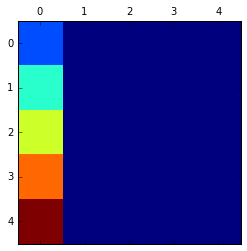

In [51]:
tablica = [[0]*5 for _ in range(5)] # tablica 5x5

for i in range(5):
    tablica[i][0] = i + 1 # pierwsza kolumna

print(tablica)

plt.matshow(tablica) # "rysuj" tablicę

## Screen

---

In [52]:
class Screen:
    """Ekran na bazie matplotlib.pyplot.matshow"""
    
    def __init__(self, width, height): # ustal wymiary ekrany
        self.w = width  # zapamiętaj szerokość
        self.h = height # zapamiętaj wysokość
        self.pixels = [[0]*width for _ in range(height)]
        
    def show(self, cmap=plt.cm.gray_r):
        plt.matshow(self.pixels, origin='lower', cmap=cmap)
        
    def set(self, y, x, value): # ustaw wartość piksela
        if y < self.w and x < self.h: # x <-> y
            self.pixels[x][y] = value # dla naszej wygody

## Screen test

---

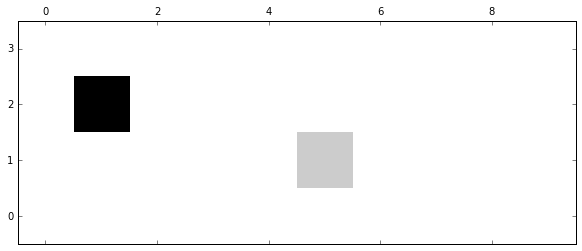

In [53]:
s = Screen(10, 4)

s.set(5, 1, 10) # [5,1] = 10
s.set(1, 2, 50) # [1,2] = 50

s.show()

## Screen test II

---

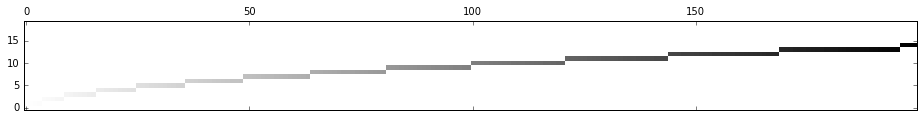

In [54]:
s = Screen(200, 20)

for x in range(200):
    s.set(x, int(x**0.5), x)
    
s.show()

## Zbiór Mandelbrota

---

* punkty $p$ (zespolone), dla których ciąg

$$z_{n+1} = z_n^2 + p$$

(gdzie $z_0 = 0$) nie dąży do nieskończoności lub

$$|z_n| < 2$$

## Implementacja

---

In [55]:
def mandelbrot(p, limit=100):
    """Zwraca n, dla którego |zn| < 2"""
    zn = p # bo z0 = 0
    
    for i in range(limit): # sprawdzamy do pewnego momentu
        if abs(zn) > 2: # zwróć miejsce, w którym
            return i    # warunek nie jest już spełniony
        
        zn = zn**2 + p # następny wyraz ciągu
        
    return limit # warunek spełniony do limitu

## Przygotowanie zbioru

---

In [56]:
size = 1000

s = Screen(size, size)

# podwójna pętla po wszystkich pikselach
for x in range(size):
    for y in range(size):
        xs = -2.0 + 2.5 * x / size   # [-2.0, 0.5]
        ys = -1.25 + 2.5 * y / size # [-1.25, 1.25]
        s.set(x, y, mandelbrot(complex(xs, ys)))

## Najsłynniejszy fraktal

---

In [57]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10, 8)

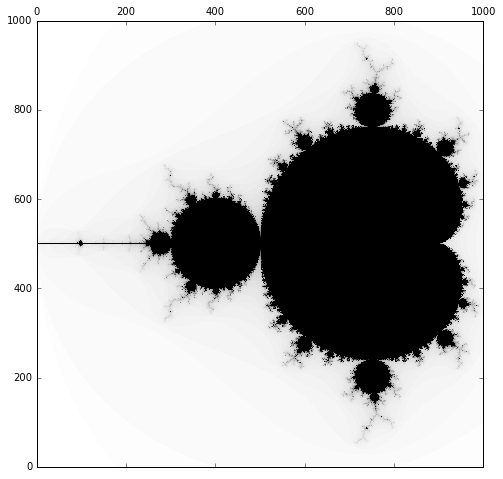

In [58]:
s.show()

## IFS (*iterated function system*)

---

* geometria fraktalna
* przykład - paproć Barnsleya:

$$f_1(x, y) = (0.85x + 0.04y, -0.04x + 0.85y + 1.6)$$
$$f_2(x, y) = (-0.15x + 0.28y, 0.26x + 0.24y + 0.44)$$
$$f_3(x, y) = (0.20x - 0.26y, 0.23x + 0.22y + 1.6)$$
$$f_4(x, y) = (0, 0.16y)$$

* w proporcjach 85:7:71

## Paproć Barnsleya

---

![](https://upload.wikimedia.org/wikipedia/commons/9/9c/Fractal_fern-Barnsley_animation.gif)

## IFS - przykład

---

In [59]:
# źródło: https://scratch.mit.edu/projects/92421819/

def f1(x, y): return 0.03*x, 0.1*y

def f2(x, y): return 0.85*x, 0.85*y + 1.5

def f3(x, y): return 0.8*x, 0.8*y + 1.5

def f4(x, y): return 0.2*x - 0.08*y, 0.15*x + 0.22*y + 0.85

def f5(x, y): return -0.2*x + 0.08*y, 0.15*x + 0.22*y + 0.85

def f6(x, y): return 0.25*x-0.1*y, 0.12*x + 0.25*y + 0.3

def f7(x, y): return -0.2*x + 0.1*y, 0.12*x + 0.2*y + 0.4

## Losowanie

---

In [60]:
from random import randint

def random_f():
    # proporcje 2:60:10:7:7:7:7
    x = randint(1,100)
    if x <= 2: return f1
    if x <= 62: return f2
    if x <= 72: return f3
    if x <= 79: return f4
    if x <= 86: return f5
    if x <= 93: return f6
    return f7

## Przygotowanie danych

---

In [61]:
n_iter = 100000
size = 1000

s = Screen(size, size)

x, y = 0, 0 # punkt początkowy

for _ in range(n_iter):
    f = random_f() # losowa funkcja
    x, y = f(x, y) # nowe współrzędne
    xs = (x + 1.0) * size / 2
    ys = y * size / 10.0
    s.set(int(xs), int(ys), 500 - abs(xs - 500))

## Wesołych Świąt

---

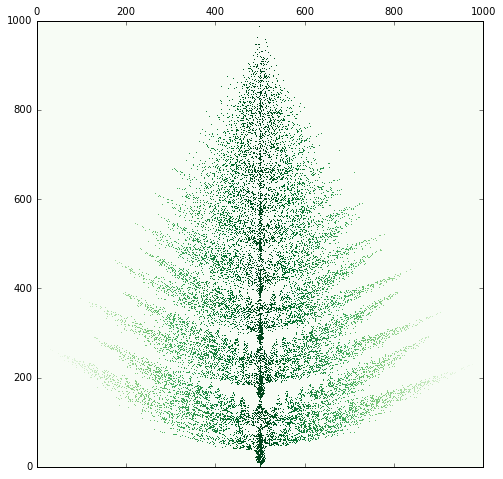

In [62]:
s.show(plt.cm.Greens)